### 以線性回歸分析一縣市對"以民法保障同性婚姻"接受程度，與該縣市的受大學以上教育程度是否相關
資料來源:
公投14案(https://data.gov.tw/dataset/95883)
各縣市十五歲以上人口數按教育程度(7類)及性別(https://gis.ris.gov.tw/dashboard.html?key=B04)

In [155]:
#import necessary library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

In [156]:
#讀入全縣市15歲以上人口數資料
totalPeople = pd.read_csv("totalPeople.csv", converters=
                          {'總計' : lambda x : x.replace(',', '')} )
totalPeople.set_index(["區域別"], inplace=True)
totalPeople.rename(columns={'總計':'15歲以上人數'}, inplace=True)
totalPeople = totalPeople.applymap(lambda x : int(x))

#讀入全縣市15歲以上大學以上學歷者人數資料
eduPeople = pd.read_csv("eduPeople.csv", converters=
                        {"博士畢業總計":lambda x : x.replace(',', ''),
                         "碩士畢業總計":lambda x : x.replace(',', ''),
                         "大學畢業總計":lambda x : x.replace(',', '')})
eduPeople.set_index(["區域別"], inplace = True)
eduPeople = eduPeople.applymap(lambda x : int(x))

#將兩張表整合
eduPeople['大學以上學歷且15歲以上人數'] = eduPeople["博士畢業總計"] + eduPeople['碩士畢業總計'] + eduPeople['大學畢業總計']
peopleInfo = pd.concat([totalPeople, eduPeople], axis=1)
peopleInfo = peopleInfo.drop("總計")

新增一行用來表示擁有大學以上學歷者占該縣市總人口數比例

In [157]:
peopleInfo["受教程度"] = peopleInfo["大學以上學歷且15歲以上人數"]/peopleInfo["15歲以上人數"]

In [158]:
print(peopleInfo.head())

     15歲以上人數  博士畢業總計  碩士畢業總計  大學畢業總計  大學以上學歷且15歲以上人數      受教程度
區域別                                                           
新北市  3505795   12923  178495  785388          976806  0.278626
臺北市  2304915   26006  234770  715281          976057  0.423468
桃園市  1886448    6742   95180  422293          524215  0.277885
臺中市  2398398   11038  125996  545708          682742  0.284666
臺南市  1653327    7466   83353  362774          453593  0.274352


In [159]:
#讀入公投14案資料
referendum14 = pd.read_csv("Case_14_result.csv")

計算各縣市的性別友善程度
以同意票數/不同意票數表示
若該比率高則性別友善程度越高

In [160]:
def genderFriendlyRatio(county):
    County = ["臺北市", "新北市", "桃園市", "臺中市", "臺南市", "高雄市", "基隆市", "新竹市", "嘉義市", "新竹縣", "苗栗縣", "彰化縣", 
         "南投縣", "雲林縣", "嘉義縣", "屏東縣", "宜蘭縣", "花蓮縣", "台東縣", "澎湖縣", "連江縣", "金門縣"]
    
    global referendum14
    
    case = referendum14[(referendum14["縣市"] == county)]
    result = np.sum(case["同意票數"])/np.sum(case["不同意票數"])
    return result

In [161]:
peopleInfo["區域"] = peopleInfo.index
peopleInfo["genderfriendliness"] = peopleInfo["區域"].apply(lambda x : genderFriendlyRatio(x))

In [162]:
peopleInfo.head()

,15歲以上人數,博士畢業總計,碩士畢業總計,大學畢業總計,大學以上學歷且15歲以上人數,受教程度,區域,genderfriendliness
區域別,,,,,,,,
新北市,3505795,12923,178495,785388,976806,0.278626,新北市,0.536722
臺北市,2304915,26006,234770,715281,976057,0.423468,臺北市,0.616302
桃園市,1886448,6742,95180,422293,524215,0.277885,桃園市,0.467514
臺中市,2398398,11038,125996,545708,682742,0.284666,臺中市,0.456328
臺南市,1653327,7466,83353,362774,453593,0.274352,臺南市,0.500264


In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

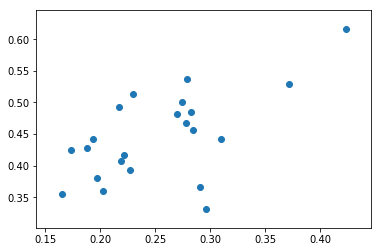

In [164]:
regr = LinearRegression()
plt.scatter(peopleInfo["受教程度"], peopleInfo["genderfriendliness"])
eduLevel = np.array(peopleInfo["受教程度"])
eduLevel = eduLevel.reshape(len(eduLevel), 1)
gfLevel = np.array(peopleInfo["genderfriendliness"])#gender friendliness level
xTrain, xTest, yTrain, yTest = train_test_split(eduLevel, gfLevel, 
                                                test_size = 0.3, random_state = 5261)

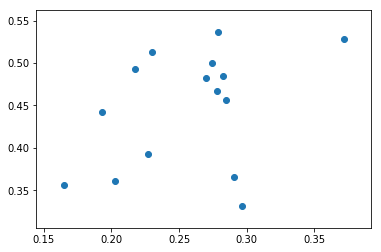

In [165]:
plt.scatter(xTrain, yTrain)

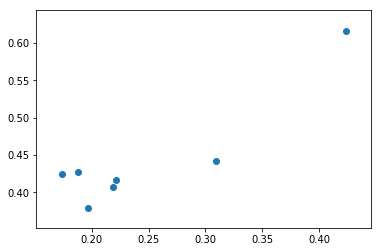

In [166]:
plt.scatter(xTest, yTest)

In [167]:
regr = LinearRegression()
regr.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
predictResult = regr.predict(eduLevel)

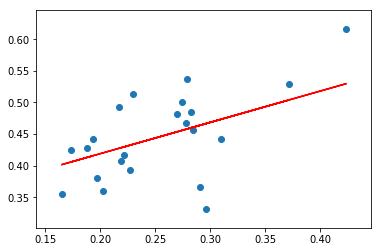

In [169]:
plt.scatter(eduLevel, gfLevel)
plt.plot(eduLevel, predictResult, 'r')

由此圖可看出正相關的趨勢，但因為誤差大，所以相關應較低或存在遺漏變數